## Simple Euler solvers - explicit (forward) and implicit

Trying to do it in the most simplified way: f is the _ODE_ that is passed as a parameter to the solver functions, x is a _vector_, and the other parameter is the time step

In [36]:
function eulerfwd(y, Δt, f)
    y = y + f(y)*Δt
    return y
end

eulerfwd (generic function with 1 method)

In [37]:
function eulerbkwd(y, Δt, f)
    y = y + f(eulerfwd(y,Δt,f))*Δt
    return y
end

eulerbkwd (generic function with 1 method)

Now, let's define f for SHO, the imple harmonic oscillator:

$\vec y = [x \ v]^T \\
\\
x' = v \\
v' = g - \dfrac{k}{m}x - \dfrac{\beta}{m}v$

In [38]:
# Example - the simplest SHO
# Using 2x2 matrix to define the system dynamics - linear ODEs

function f(y) # y is a vector: [x;v]; no friction - beta=0
    return [0 1;-1 0]*y
end

f (generic function with 1 method)

In [39]:
eulerfwd([1;0],0.1,f)

2-element Array{Float64,1}:
  1.0
 -0.1

In [40]:
eulerbkwd([1;0],0.1,f)

2-element Array{Float64,1}:
  0.99
 -0.1 

Harmonic oscillator ODE with k = 2, m = 0.5, and β = 0

In [41]:
function f(y) # y is a vector: [x;v]; no friction - beta=0
    return [0 1;-4 0]*y
end

eulerfwd([-1; -2], 0.1, f)

2-element Array{Float64,1}:
 -1.2
 -1.6

In [42]:
Δt = 0.1
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerfwd(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y


0.1 -1.2 -1.6
0.2 -1.3599999999999999 -1.12
0.3 -1.472 -0.5760000000000002
0.4 -1.5296 0.012799999999999812
0.5 -1.5283200000000001 0.6246399999999999


2-element Array{Float64,1}:
 -1.5283200000000001
  0.6246399999999999

In [43]:
using Plots; using GR
gr()

Plots.GRBackend()

In [44]:
function plot_odesolution(y0 = [-1;-2], Δt = 0.1 , n = 200, func = f, solver = eulerfwd)
    xvec = []
    yvec = []
    y = y0
    append!(xvec,y0[1])
    append!(yvec,y0[2])
    for i in 1:n
        y = solver(y,Δt,func)
        append!(xvec,y[1])
        append!(yvec,y[2])
    end
    Plots.plot(xvec,yvec,seriestype=:scatter,title="ODE Solution",marker=(:none,1),legend=nothing,fmt=:png)
end

plot_odesolution (generic function with 6 methods)

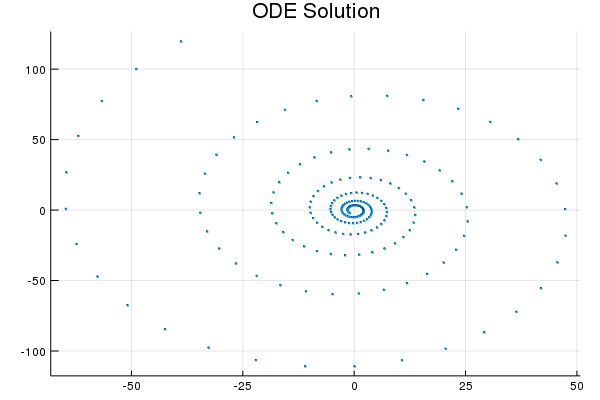

In [45]:
plot_odesolution([-1;-2],0.1,200,f)

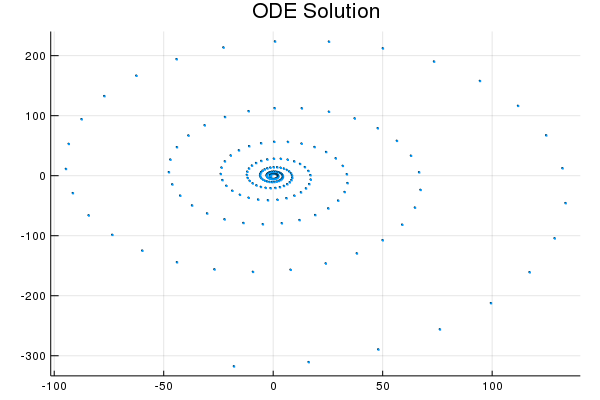

In [46]:
plot_odesolution([-1;-2],0.11,200,f)

In [47]:
Δt = 0.1
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerbkwd(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y

0.1 -1.1600000000000001 -1.52
0.2 -1.2656 -0.9951999999999999
0.3 -1.314496 -0.4491519999999998
0.4 -1.30683136 0.09461248000000022
0.5 -1.2450968576 0.6135605248000002


2-element Array{Float64,1}:
 -1.2450968576      
  0.6135605248000002

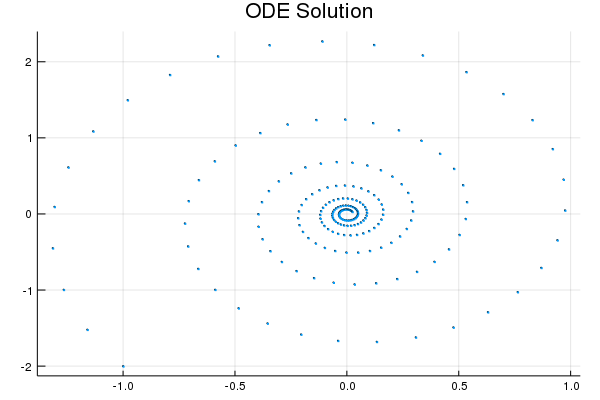

In [48]:
plot_odesolution([-1;-2],0.1,200,f,eulerbkwd)

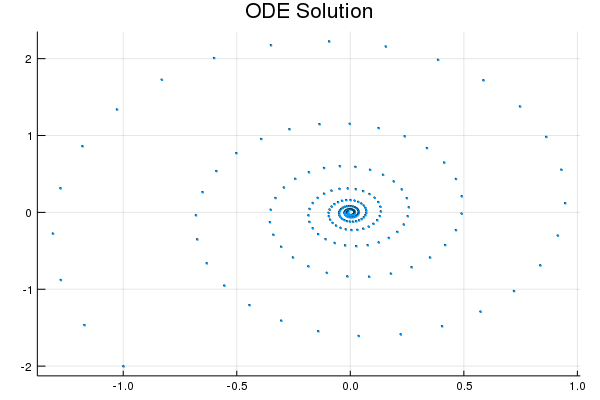

In [49]:
plot_odesolution([-1;-2],0.11,200,f,eulerbkwd)

Solving SHO equations with k=2, m=1, and $\beta$=0, from the initial condition x(t=0)=-1 , v(t=0)=-2, with a timestep of 0.05, to compute the values of x and v at t=0.5. 

In [50]:
function f(y) # y is a vector [x;v]; no friction - beta=0
    return [0 1;-2 0]*y
end

Δt = 0.05
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerfwd(y,Δt,f)
    # println(t," ",y[1]," ",y[2])
end

y

2-element Array{Float64,1}:
 -1.7208522787468752
 -0.6198190556187498

Trapezoid method, averaging forward and backward Euler

In [51]:
function eulertrapezoid(y, Δt, f)
    y = y + (f(y)+f(eulerfwd(y,Δt,f)))*Δt/2
    return y
end

eulertrapezoid (generic function with 1 method)

In [52]:
# Simple harmonic oscillator with k=2, m=0.5
function f(y) 
    return [0 1;-4 0]*y
end

Δt = 0.1
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulertrapezoid(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y


0.1 -1.18 -1.56
0.2 -1.3124 -1.0568
0.3 -1.391832 -0.5107039999999999
0.4 -1.41506576 0.056242880000000106
0.5 -1.3811401568000001 0.6211443264000002


2-element Array{Float64,1}:
 -1.3811401568000001
  0.6211443264000002

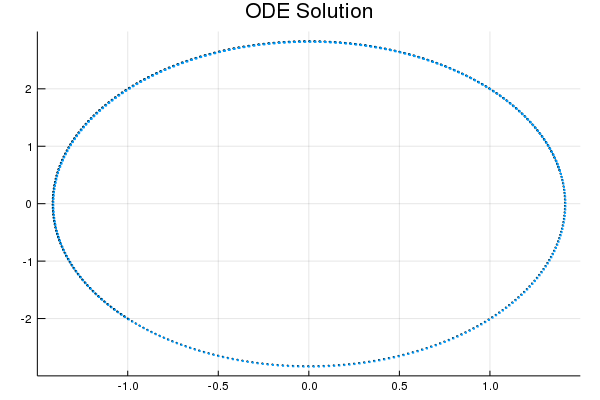

In [53]:
plot_odesolution([-1;-2],0.01,500,f,eulertrapezoid)

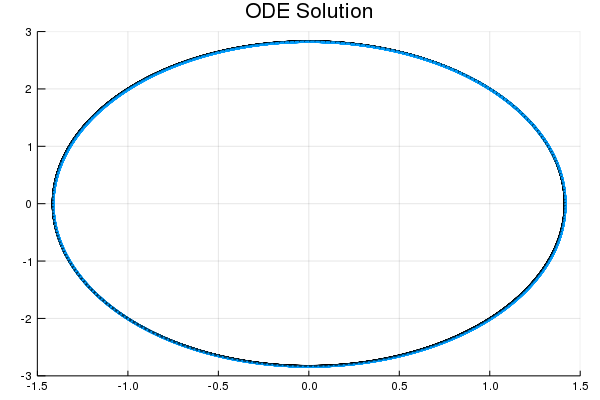

In [54]:
plot_odesolution([-1;-2],0.01,50000,f,eulertrapezoid)

In [55]:
Δt = 0.05
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulertrapezoid(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y

0.05 -1.095 -1.79
0.1 -1.179025 -1.5620500000000002
0.15 -1.251232375 -1.3184347500000002
0.2 -1.310897950625 -1.0615961012500001
0.25 -1.357423265934375 -0.7941085306187501
0.3 -1.3903415761356406 -0.5186533347787813
0.35 -1.4093225349939014 -0.23799175287775926
0.4 -1.4141755099628197 0.045062712885409806
0.45 -1.404851496768735 0.3276725013135467
0.5 -1.3814436142192141 0.607004438160726


2-element Array{Float64,1}:
 -1.3814436142192141
  0.607004438160726 

## RK4 solver

Given the initial value problem

$\dot{\vec{x}}=f(\vec{x}), \;\;\vec{x}(t_0)=\vec{x}_0$

fourth-order Runge-Kutta is typically defined as follows:

$\vec{x}(t+\Delta t) = \vec{x}(t) + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$k_1 = f(\vec{x}(t))$,

$k_2 = f(\vec{x}(t)+\frac{h}{2}k_1),$

$k_3 = f(\vec{x}(t)+\frac{h}{2}k_2),$

$k_4 = f(\vec{x}(t)+hk_3).$


In [56]:
function rk4(y, Δt, f)
    k1 = f(y)
    k2 = f(y + (Δt/2).*k1)
    k3 = f(y + (Δt/2).*k2)
    k4 = f(y+Δt*k3)
    y = y + (Δt/6).*(k1+k2.*2+k3.*2+k4)
    return y
end

rk4 (generic function with 1 method)

Let's apply to the Lorenz attractor:

$\vec v = [x \ y \ z]^T \\
\\
x' = \sigma(y-x) \\
y' = x(\rho-z)-y \\
z' = xy-\beta z$

In [57]:
function lorenz(v) # y is vector of x,y,z
    σ = 10.0
    ρ = 28.0
    β = 8/3
    return [σ*(v[2]-v[1]); v[1]*(ρ-v[3])-v[2]; v[1]*v[2]-β*v[3]]
end

lorenz (generic function with 1 method)

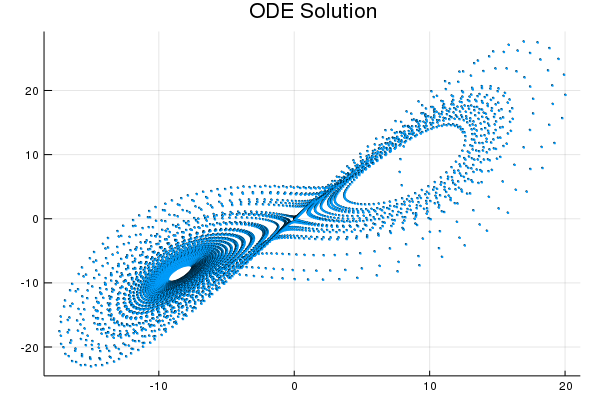

In [58]:
plot_odesolution([10;-2;0], 0.01 , 5000, lorenz, rk4)

Let's experiment with 3D plots, trying to adapt the following example:

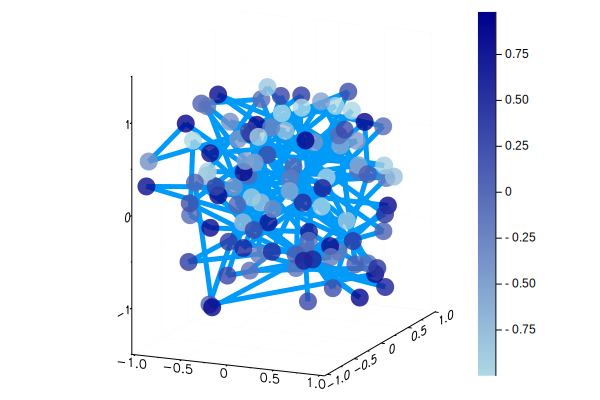

In [59]:
x = 2 .* rand(100) .- 1
y = 2 .* rand(100) .- 1
z = 2 .* rand(100) .- 1
c = 999 .* rand(100) .+ 1

Plots.plot(x, y, z, zcolor=reverse(z), m=(10, 0.8, :blues, Plots.stroke(0)), leg=false, cbar=true, w=5)

In [60]:
function plot_odesolution3d(y0, Δt, n, func, solver)
    xvec = []
    yvec = []
    zvec = []
    y = y0
    append!(xvec,y0[1])
    append!(yvec,y0[2])
    append!(zvec,y0[3])
    for i in 1:n
        y = solver(y,Δt,func)
        append!(xvec,y[1])
        append!(yvec,y[2])
        append!(zvec,y[3])
    end
    Plots.plot(xvec,yvec,zvec, zcolor=reverse(z), m=(1, 0.8, :blues, Plots.stroke(0)), leg=false, cbar=true, w=1)
end

plot_odesolution3d (generic function with 1 method)

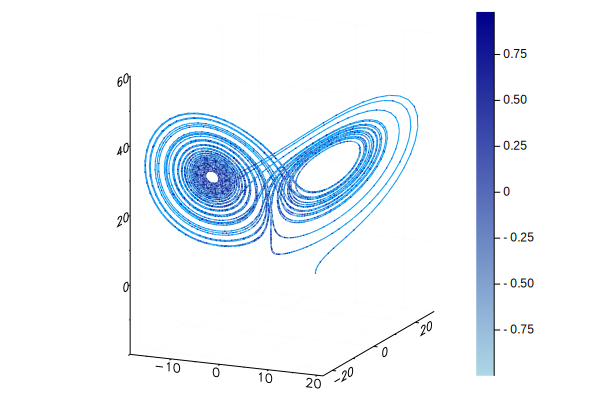

In [61]:
plot_odesolution3d([10;-2;0], 0.01 , 5000, lorenz, rk4)